In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(15,9)}) # Ændrer standardstørrelsen på plots
df = pd.read_csv('https://github.com/CALDISS-AAU/workshop_python-data-analysis/raw/master/datasets/ESS2014DK_sub1.csv')
df['age'] = 2014 - df['yrbrn']

# ØVELSE: Hvordan fordeler glæde sig på tværs af køn?

I skal i denne øvelse få et overblik over, hvordan fordelingen i glæde (variablen `happy`) er forskellige på tværs af køn.

1. Grupper data efter `gndr` med `.groupby()`
2. Brug `value_counts()` til at optælle fordelingen i variablen `happy`.
3. Brug `unstack()` og `plot.bar()` til at visualisere fordelingen.

***BONUS ØVELSE***
Kategorierne i `happy` står i forkert rækkefølge. Løs dette ved at rekode værdierne sådan, at værdierne står i rækkefølge.

## Løsning

In [7]:
grouped_df = df.groupby('gndr')
grouped_df['happy'].value_counts()

gndr    happy          
Female  9                  108
        8                   82
        Extremely happy     63
        7                   32
        5                   10
        6                    8
        2                    6
        1                    2
        3                    2
Male    8                  114
        9                  106
        Extremely happy     74
        7                   41
        6                   19
        5                   11
        3                    6
        4                    2
        2                    1
Name: happy, dtype: int64

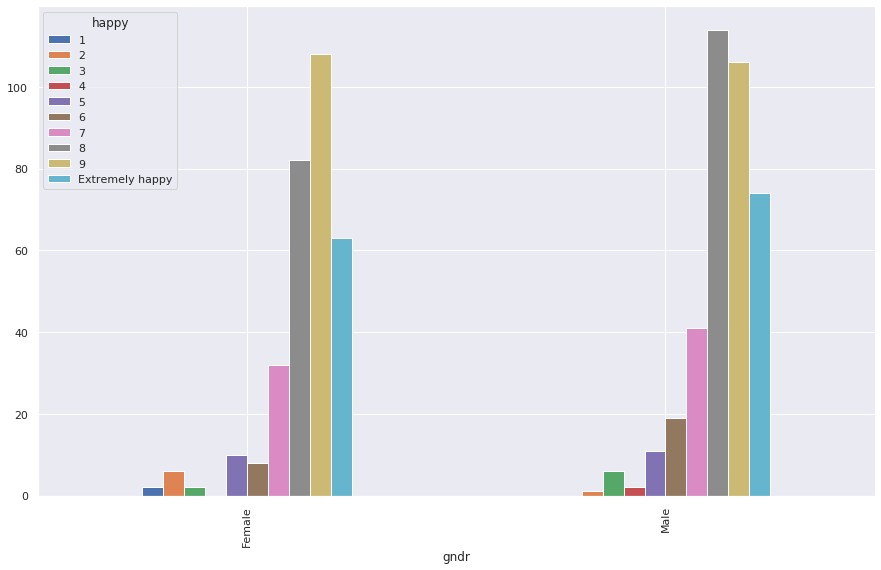

In [8]:
grouped_df['happy'].value_counts().unstack('happy').plot.bar()

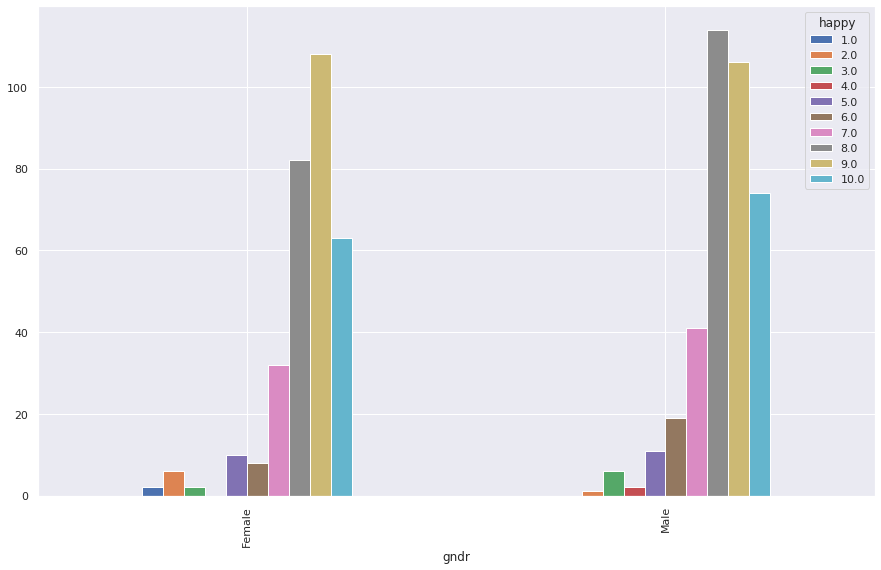

In [9]:
df['happy'] = df['happy'].replace({"Extremely unhappy": "0", "Extremely happy": "10"}).astype('float')

grouped_df = df.groupby('gndr')
grouped_df['happy'].value_counts().unstack('happy').plot.bar()

I ovenstående sker følgende:
- Værdierne "Extremely unhappy"/"Extremely happy" erstattes med hhv. "0" og "10". De erstattes med tekstværdier, da variablen lige nu er kodet som tekst. Rekodning i replace specificeres som en dictionary `{}` ( `{value: replacement}`).
- Variablen konverteres til `float`. Den konverteres til `float`, da integer ikke kan indeholde missingværdier.

# ØVELSE: Flere grupperinger

1. Dan en kategorisk variabel, der inddeler respondeter i 3 lige store grupper efter vægt (brug `pd.cut()`)

2. Dan en visualisering, der viser fordeling af svar i `alcfreq` splittet ud på køn og vægtkategori (brug enten seaborn eller `.plot` på grupperet data (`.groupby()`)

## Løsning

In [10]:
df['alcfreq'].unique()

array(['Never', 'Several times a week', 'Once a week', 'Every day',
       'Less than once a month', 'Once a month', nan, '2-3 times a month'],
      dtype=object)

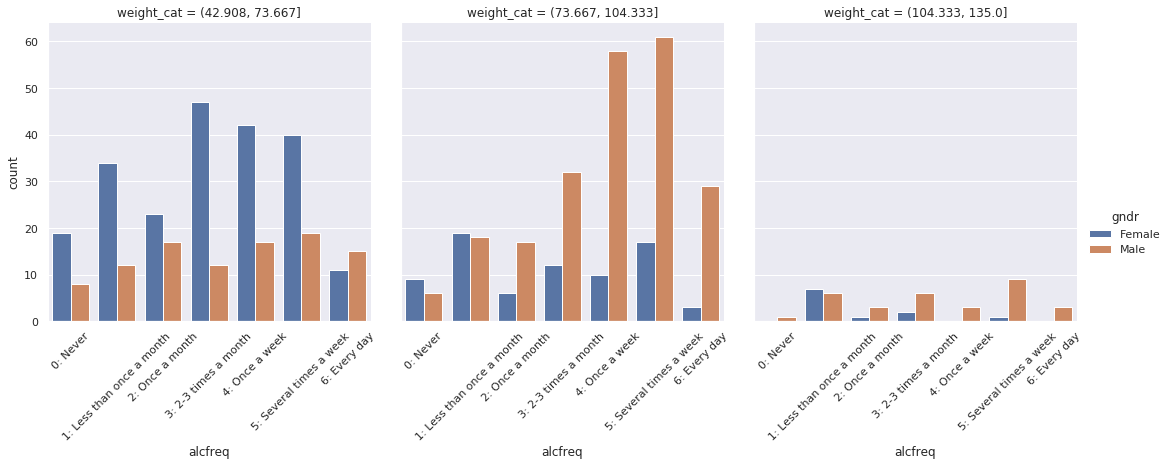

In [11]:
df['weight_cat'] = pd.cut(df['weight'], 3)

#valgfrit - rekod alcfreq
alcfreq_map = {'Never': '0: Never', 'Less than once a month':'1: Less than once a month', 'Once a month':'2: Once a month', '2-3 times a month':'3: 2-3 times a month', 
               'Once a week':'4: Once a week', 'Several times a week': '5: Several times a week', 'Every day': '6: Every day'}
df['alcfreq'] = df['alcfreq'].replace(alcfreq_map)

# med seaborn
alc_plot = sns.catplot(data = df.sort_values('alcfreq'), kind = "count", x = "alcfreq", hue = "gndr", col = "weight_cat")
alc_plot.set_xticklabels(rotation=45)

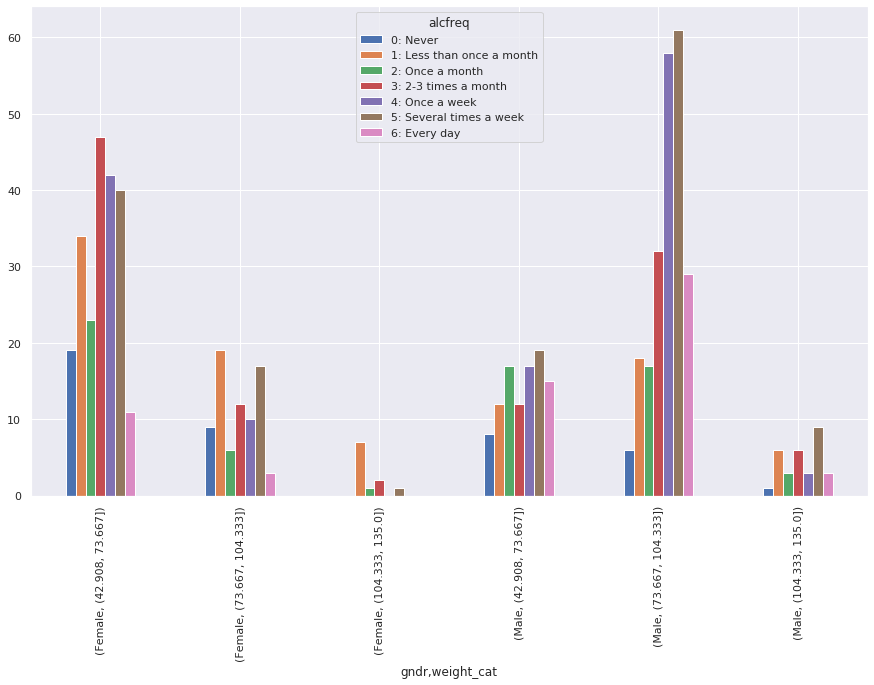

In [12]:
# med groupby
grouped_df = df.groupby(['gndr', 'weight_cat'])

grouped_df['alcfreq'].value_counts().unstack('alcfreq').plot.bar()

# ØVELSE: Håndtering af missing

I skal lave jeres visualisering fra sidste øvelse igen (en visualisering, der viser fordeling af svar i `alcfreq` inden for hver gruppering af køn og vægtkategori), men denne gang vil vi gerne have nogen af missingværdierne i `weight` med.

1. Dan en `weight_imputed` variabel, hvori missingværdier for `weight` erstattes med middelvægten.
2. Dan vægtkategorien igen med `weight_imputed` variablen
3. Dan visualiseringen igen

***BONUSØVELSE***

Sammenlign fordelingerne i `alcfreq` indenfor hver køn og vægtkateogi før og efter imputering/erstatning af missingværdi - Er der forskel?

## Løsning

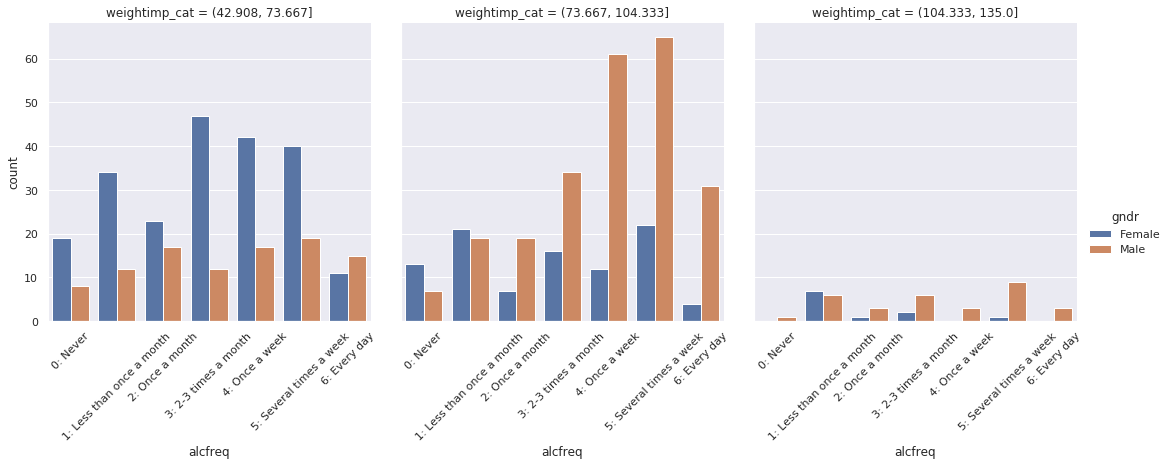

In [228]:
mean_weight = df['weight'].mean()

df['weight_imputed'] = df['weight'].fillna(mean_weight)
df['weightimp_cat'] = pd.cut(df['weight_imputed'], 3)

alc_plot = sns.catplot(data = df.sort_values('alcfreq'), kind = "count", x = "alcfreq", hue = "gndr", col = "weightimp_cat")
alc_plot.set_xticklabels(rotation=45)

# ØVELSE: Krydstabel

Dan en krydstabel mellem `alcfreq` og vægtkategori-variablen fra sidste øvelse.

Kombiner evt. med seaborns heatmap-funktion.

## Løsning

In [250]:
pd.crosstab(df['weightimp_cat'], df['alcfreq'], normalize = 'columns')

alcfreq,0: Never,1: Less than once a month,2: Once a month,3: 2-3 times a month,4: Once a week,5: Several times a week,6: Every day
weightimp_cat,,,,,,,
"(42.908, 73.667]",0.568627,0.46,0.577465,0.500,0.447552,0.381818,0.417910
"(73.667, 104.333]",0.411765,0.41,0.366197,0.425,0.531469,0.557576,0.537313
"(104.333, 135.0]",0.019608,0.13,0.056338,0.075,0.020979,0.060606,0.044776


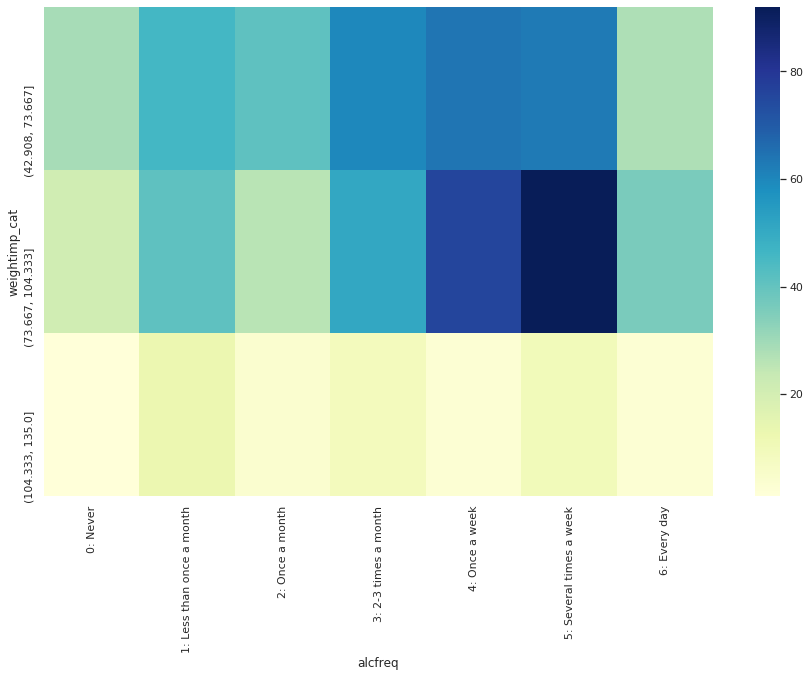

In [251]:
sns.heatmap(pd.crosstab(df['weightimp_cat'], df['alcfreq']), cmap="YlGnBu", annot=False, cbar=True)

# ØVELSE: Merge/Join med Pandas i Python

Denne øvelse samler op på det meste, som er blevet gennemgået i dag.

Vi vil gerne undersøge fordelingen i tillid til politiet (`trstplc`) på tværs af partitilhør.

1. Vores data indeholder endnu ikke partitilhør, men det kan vi måske gøre noget ved...

    Indlæs datasættet `ESS2014DK_polpartsub.csv` fra 'https://github.com/CALDISS-AAU/workshop_python-data-analysis/raw/master/datasets/ESS2014DK_polpartsub.csv'
    
    Undersøg datasættet: Er der en nøgle?
    
    Brug `pd.merge()` til at tilføje `ESS2014DK_polpartsub` til det datasæt, I allerede har.
    
    
2. Dan en krydstabel med `pd.crosstab()` over partitilhør (`polpartvt`) og tillid til politiet (`trstplc`)


3. Der er værdier i partitilhør-variablen og variablen for tillid til politiet, som ikke kan bruges til noget. Konverter disse til missing med `replace()` (husk at `np.nan` værdien bruges til at ændre til missing).

4. Dan krydstabellen igen


***BONUSØVELSE***

1. Undersøg, om fordelingen er forskellig på tværs af køn med groupby

2. Find en passende måde at vise forskellen; enten ved brug af grafer eller ved at udregne middelværdi for tillid til politiet (dette kræver, at variablen konverteres til numerisk)
    

## Løsning

In [ ]:
df_polpart = pd.read_csv('https://github.com/CALDISS-AAU/workshop_python-data-analysis/raw/master/datasets/ESS2014DK_polpartsub.csv')

df_all = pd.merge(df_merge, df_polpart, on = 'idno', how='outer', validate="one_to_one")

pd.crosstab(df_all['trstplc'], df_all['polpartvt'], normalize='columns')

In [ ]:
df_all['trstplc'] = df_all['trstplc'].replace({"Don't know": np.nan, "Complete trust":"10", "No trust at all":"0"}).astype('float')

df_all['polpartvt'] = df_all['polpartvt'].replace({"[NA] Don't know": np.nan, "[NA] No answer": np.nan, "[NA] Not applicable": np.nan, "[NA] Refusal": np.nan})
pd.crosstab(df_all['trstplc'], df_all['polpartvt'], normalize='columns')

In [ ]:
# BONUS

grouped_df = df_all.groupby(['gndr', 'polpartvt'])

grouped_df['trstplc'].mean()

In [ ]:
grouped_df['trstplc'].mean().unstack('gndr').plot.bar()
plt.xlabel("Political Party")
plt.ylabel("Mean trust in police score")

In [ ]:
# seaborn count plot:

sns.catplot(data = df_all.sort_values('trstplc'), kind = "count", x = 'trstplc', hue = 'gndr', col = 'polpartvt', col_wrap = 3)